In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Load your CSV
df = pd.read_csv('data_sets\ecg_train1.csv')

# Split features and labels
X = df.iloc[:, :-1].values  # all columns except last
y = df.iloc[:, -1].values   # last column is label

# Normalize ECG signals (optional but recommended)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Save the fitted scaler
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved as 'scaler.pkl'")

# Reshape for 1D CNN: (samples, time steps, 1 channel)
X = X[..., np.newaxis]  # shape: (samples, signal_length, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<>:7: SyntaxWarning: invalid escape sequence '\e'
<>:7: SyntaxWarning: invalid escape sequence '\e'
C:\Users\acer\AppData\Local\Temp\ipykernel_22052\3918596902.py:7: SyntaxWarning: invalid escape sequence '\e'
  df = pd.read_csv('data_sets\ecg_train1.csv')


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


C:\Users\acer\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\acer\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\acer\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please upd

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 185, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 92, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 90, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 45, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2880)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       184,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 190,785 (745.25 KB)

 Trainable params: 190,785 (745.25 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8470 - loss: 0.3385 - val_accuracy: 0.8999 - val_loss: 0.2638
Epoch 2/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9229 - loss: 0.2064 - val_accuracy: 0.9240 - val_loss: 0.1958
Epoch 3/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9454 - loss: 0.1486 - val_accuracy: 0.9454 - val_loss: 0.1528
Epoch 4/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9603 - loss: 0.1066 - val_accuracy: 0.9592 - val_loss: 0.1254
Epoch 5/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9697 - loss: 0.0833 - val_accuracy: 0.9656 - val_loss: 0.1077
Epoch 6/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9793 - loss: 0.0603 - val_accuracy: 0.9686 - val_loss: 0.1095
Epoch 7/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9831 - loss: 0.0508 - val_accuracy: 0.9777 - val_loss: 0.0936
Epoch 8/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9870 - loss: 0.0387 - val_accuracy: 0.

In [4]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9876 - loss: 0.0404
Test accuracy: 0.99


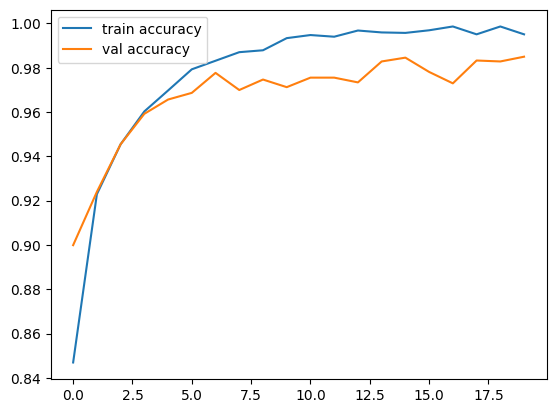

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()


In [12]:
# Load CSV as strings first
new_df = pd.read_csv(r"data_sets\ecg_test.csv", header=None, dtype=str)

processed_signals = []
target_len = 187  # same length as used in training

for idx, row in new_df.iterrows():
    # Convert row to numeric, replace bad values with 0
    signal = pd.to_numeric(row, errors='coerce').fillna(0).values.flatten()
    
    # Pad or truncate to target length
    if len(signal) < target_len:
        signal = np.pad(signal, (0, target_len - len(signal)), mode='constant')
    elif len(signal) > target_len:
        signal = signal[:target_len]
    
    processed_signals.append(signal)

# Stack all signals for CNN input
new_X = np.stack(processed_signals)

# Normalize with the same scaler used in training
new_X = scaler.transform(new_X)

# Reshape for CNN (samples, signal_length, 1)
new_X = new_X[..., np.newaxis]

# Predict
predictions = model.predict(new_X)
predicted_labels = (predictions > 0.5).astype(int)

# Show predictions
for i, p in enumerate(predicted_labels):
    print(f"ECG {i+1}: {'Abnormal' if p[0] == 1 else 'Normal'}")

# Save the model
model.save("ecg_cnn_model.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
ECG 1: Normal
